In [1]:
include("../Engine/Engine.jl")
using .Engine

using StatsBase, DataFrames
using Graphs, SimpleWeightedGraphs
import PyPlot as plt
import Seaborn as sns
import PlotlyJS

WebIO._IJuliaInit()

In [ ]:
graphs_JDD, cascades_JDD, df_JDD = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/JDD_all_users/COP27/data.jld2")
graphs_TE, cascades_TE, df_TE = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/TE_all_users/COP27/data.jld2")

In [5]:


_, _, actors_JDD = partitions_actions_actors(df_JDD)
_, _, actors_TE = partitions_actions_actors(df_TE)

if !(actors_JDD == actors_TE)
    print("zut")
end

In [6]:
function indegree_centralities2(influence_graphs::InfluenceGraphs, df::DataFrame; cuttoff::Real = 0.0, edge_type::AbstractString = "Any Edge")

    _, actions, actors = partitions_actions_actors(df)

    # Create simple graphs by removing weights not needed for the centrality
    simplifier = make_simplifier(edge_type, cuttoff, actions)
    simple_graphs = [SimpleDiGraph(simplifier.(graph)) for graph in influence_graphs]
    indegree_centrality = [indegree(graph) for graph in simple_graphs]

    return indegree_centrality
end



"""
Compute the out-degree centralities of each partition of the influence graphs.
"""
function outdegree_centralities2(influence_graphs::InfluenceGraphs, df::DataFrame; cuttoff::Real = 0.0, edge_type::AbstractString = "Any Edge")

    _, actions, actors = partitions_actions_actors(df)

    # Create simple graphs by removing weights not needed for the centrality
    simplifier = make_simplifier(edge_type, cuttoff, actions)
    simple_graphs = [SimpleDiGraph(simplifier.(graph)) for graph in influence_graphs]
    outdegree_centrality = [outdegree(graph) for graph in simple_graphs]

    return outdegree_centrality
end

outdegree_centralities2

In [8]:
in_JDD = indegree_centralities2(graphs_JDD, df_JDD)
out_JDD = outdegree_centralities2(graphs_JDD, df_JDD)

in_TE = indegree_centralities2(graphs_TE, df_TE)
out_TE = outdegree_centralities2(graphs_TE, df_TE)

# involvment_JDD = [in .+ out for (in, out) in zip(in_JDD, out_JDD)]
# involvment_TE = [in .+ out for (in, out) in zip(in_TE, out_TE)]

3-element Vector{Vector{Int64}}:
 [7, 6, 3, 3, 7, 7, 11, 0, 11, 4  …  18, 11, 3, 10, 6, 13, 1, 5, 4, 1]
 [15, 13, 3, 13, 6, 19, 3, 17, 14, 18  …  18, 29, 5, 1, 9, 14, 3, 2, 5, 16]
 [28, 55, 11, 21, 22, 29, 16, 20, 36, 9  …  29, 10, 15, 2, 8, 4, 4, 7, 5, 12]

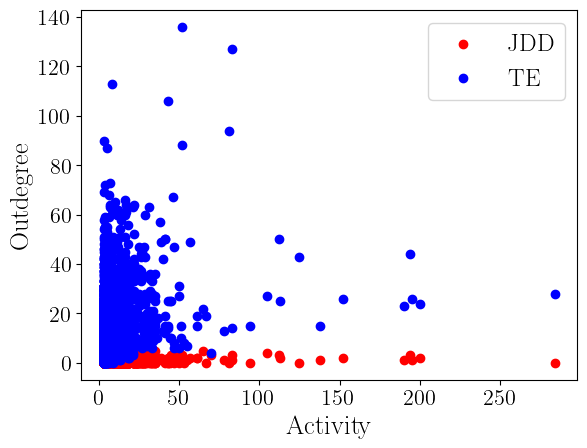

PyObject <matplotlib.legend.Legend object at 0x1392adab0>

In [12]:
idx = 3

actors_ = actors_JDD[idx]
out_JDD_ = in_JDD[idx]
out_TE_ = out_TE[idx]


all_actors = unique(df_JDD, :username)

activity = []

for actor in actors_
    count = all_actors.tweet_count[findfirst(actor .== all_actors.username)]
    push!(activity, count)
end

plt.figure()
plt.scatter(activity, out_JDD_, label="JDD", color="r")
plt.scatter(activity, out_TE_, label="TE", color="b")
plt.xlabel("Activity")
plt.ylabel("Outdegree")
plt.legend()


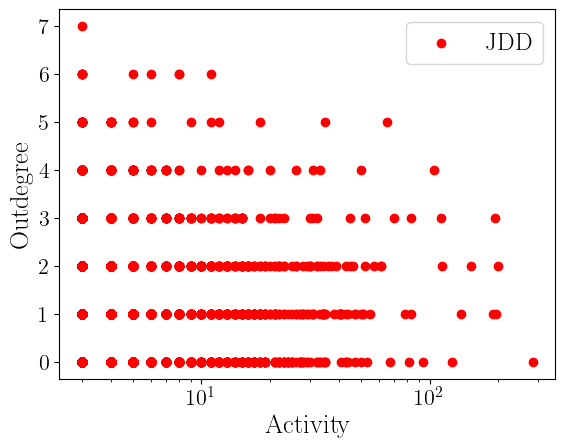

PyObject <matplotlib.legend.Legend object at 0x139e08ac0>

In [27]:
plt.figure()
plt.scatter(activity, out_JDD_, label="JDD", color="r")
# plt.scatter(activity, out_TE_, label="TE", color="b")
plt.xlabel("Activity")
plt.ylabel("Outdegree")
plt.xscale("log")
plt.legend()

In [23]:
using GLM

data = DataFrame(X=activity,Y=out_JDD_)
ols = lm(@formula(Y ~ X), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)  Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   1.3866      0.0283129  48.97    <1e-99   1.33109    1.44211
X: 4         -0.0612359   0.0503356  -1.22    0.2238  -0.159922   0.0374497
X: 5         -0.190749    0.061699   -3.09    0.0020  -0.311713  -0.0697843
X: 6         -0.443541    0.0737768  -6.01    <1e-08  -0.588184  -0.298897
X: 7         -0.34515     0.0869443  -3.97    <1e-04  -0.515609  -0.174691
X: 8         -0.265582    0.0954402  -2.78    0.0054  -0.452698  -0.0784662
X: 9         -0.470812    0.120542   -3.91    <1e-04  -0.707141  -0.234482
X: 10        -0.422315  

In [26]:
sort(unique(data.X))

69-element Vector{Any}:
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
  14
  15
   ⋮
  94
 105
 112
 113
 125
 138
 152
 190
 194
 195
 200
 284

In [22]:
data = DataFrame(X=rand(0:5, 200), Y=rand(200))
ols = lm(@formula(Y ~ X), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   0.509174     0.0377332  13.49    <1e-29   0.434764   0.583585
X            -0.00613195   0.0116116  -0.53    0.5980  -0.0290302  0.0167663
────────────────────────────────────────────────────────────────────────────